<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">

##  [Seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html)

Seaborn é uma biblioteca de visualização de dados Python baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

## Antes de tudo
### Instalação
Se você tem o Anaconda instalado, você provavelmente já possui o Seaborn instalado.

Para checar, rode o seguinte comando no Jupyter Notebook ou interpretador do python:

In [1]:
import seaborn

Se não der erro, é porque está tudo ok!

Caso você tenha um erro, será necessário instalar a biblioteca. Para isso, rode o seguinte comando no prompt/terminal de comando:

In [2]:
!pip install -q seaborn

Em caso de problemas nessa parte, entre em contato no chat da sua turma ou no Q&A.

### Importando a biblioteca
Assim como importamos pandas como pd e numpy como np, existe uma convenção de se importar seaborn como sns, como mostrado abaixo:

In [3]:
import seaborn as sns
%matplotlib inline

## API
Sendo uma biblioteca construída como uma casa envolta do matplotlib, **tudo que aprendemos sobre matplotlib se aplica aqui** em termos de conceitos (*Figure, Axes, labels dos eixos, etc*). Porém, o seaborn abstrai para o usuário da biblioteca algumas complexidades, tendo uma excelente integração com DataFrames do pandas.

Como mostra a [documentação da sua API](https://seaborn.pydata.org/api.html), ela é separada em 9 grupos, como mostra a lista a seguir:

- Gráficos relacionais
     - gráficos básicos, exemplos: dispersão e linha
- Categóricos
     - exemplo: gráfico de barras, diagrama de caixa
- Distribuição
     - exemplo: gráfico de distribuição
- Regressão:
     - exemplo regressão linear
- Matriz
     - exemplo: mapa de calor
- Multi-gráfico
     - exemplo: pairplot, jointplot, para múltiplos gráficos em 1 passo
- Controle de estilo
     - exemplos: set, set_style para configurar estilos
- Paleta de cores
     - exemplos: dark_pallete, light_pallete para configurar as cores utilizadas
- Utilitários
     - load_dataset: carregar dados para exemplos
Veremos agora as funções mais comumente utilizadas do Seaborn.

## Análise dos dados
Antes de começar, vamos dar uma olhada nos dados que iremos utilizar em boa parte dos exemplos: um dataset de gorjetas ou tips.

Iremos utilizar a função utilitária que vem com o seaborn, a **load_dataset**, para carregar os dados, que já é um DataFrame:

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- total_bill: total da conta do restaurante
- tip: gorjeta
- sex: gênero da pessoa que pagou a conta
- smoker: tinha fumantes no grupo?
- day: dia da semana
- time: almoço ou janta?
- size: tamanho do grupo

Iremos aproveitar o momento e chamar a seguinte função para configurar estilos padrões do seaborn:

In [5]:
sns.set()

Esse passo é opcional. Caso não efetuado, os gráficos possuirão os estilos padrões do matplotlib. Mais sobre outros estilos na seção **Estilos e Cores**.

## Distribuição
Essa função combina a função **plt.hist**, que vimos no artigo de matplotlib (com cálculo automático de uma boa quantidade de bins) com as funções do seaborn **kdeplot()** e **rugplot()**.

C:\Users\adm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adm\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


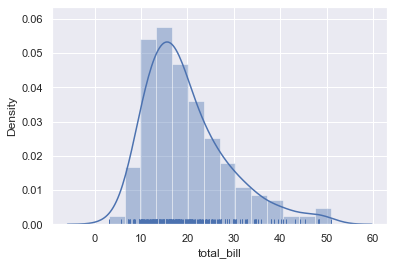

In [9]:
sns.distplot(tips['total_bill'], rug=True, kde=True);

## Entendendo o gráfico
Para entedermos melhor esse gráfico, precisamos entender um pouquinho o que é KDE, abreviação de Kernel Density Estimation, que traduzido seria Estimativa de densidade kernel e o rug plot (gráfico de tapete).

### Do Wikipedia:

*Rug Plot*

>Um gráfico de tapete é um gráfico de dados para uma única variável quantitativa, exibida como marcas ao longo de um eixo. É usado para visualizar a distribuição dos dados. Como tal, é análogo a um histograma com compartimentos de largura zero ou um gráfico de dispersão unidimensional.

*KDE*

>Em Estatística, estimativa de densidade por Kernel (EDK) é uma forma não-paramétrica para estimar a Função densidade de probabilidade (FDP) de uma variável aleatória. Estimativa da densidade por Kernel é um problema fundamental de suavização de dados onde inferências sobre a população são feitas com base em uma amostra de dados finita.

De forma bem simplifcada então, juntando os dois conceitos, podemos pensar que o gráfico de linha KDE é basicamente a soma das várias gaussianas envolta de cada ponto individual (representado no rug plot pelo traço vertical). Quando mais gaussianas se sobrepõe, maior a soma e portanto maior o pico da função KDE.

A imagem abaixo ilustra bem:

<img src = "https://images2.imgbox.com/1a/ff/yDsC01R5_o.png" width="500">

### Customizando
Podemos customizar de várias formas nosso gráfico, por exemplo:

C:\Users\adm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


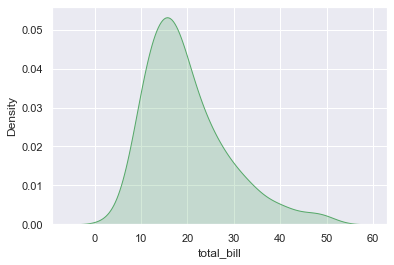

In [11]:
sns.distplot(
    tips['total_bill'],
    hist=False,  # não mostrar o histograma
    color="g",   # cor verde
    # para customizar mais profundamente,
    # podemos passar parâmetros do matplotlib dessa forma:
    kde_kws={"shade": True}  #  preencher de verde 
);

### Categóricos
Quanto possuímos uma variáveis categórias, como por exemplo: genêro (masculino, feminino), fumante (sim ou não), queremos ver como uma variável numérica se comporta para seus diferentes valores, ou mesmo uma mera contagem.

Apenas com a variável categória, podemos ver sua contagem como um gráfico de barras:

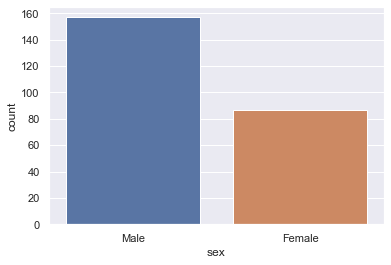

In [13]:
# contagem para a columa "sex"
sns.countplot(x='sex', data=tips);

Já em relação a variável contínua **total_bill**, podemos visualizar seu comportamento para os diferentes gêneros também na forma de um gráfico de barras:

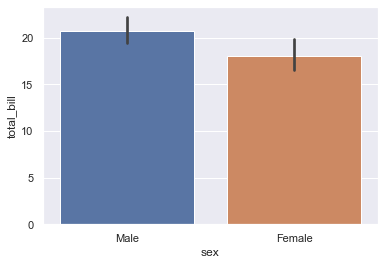

In [15]:
sns.barplot(x='sex', y='total_bill', data=tips);

O risco preto no centro da barra é chamado de [intervalo de confiança](https://pt.wikipedia.org/wiki/Intervalo_de_confian%C3%A7a), por padrão no valor de 95%.

Outro tipo de gráfico amplamente utilizado é o boxplot ou diagrama de caixa. Ele é um pouco mais complicado de entender a primeira vista, requerindo um conhecimento prévio para 100% de entendimento:
    
<img src = "https://images2.imgbox.com/ae/d7/dEjJdP8O_o.png" width="500">    

Sendo o limite superior definido por:

<br>

\begin{aligned} 
\large min(max(f(x)),Q3+1,5⋅IQR)
\end{aligned}

<br>

E o inferior:

<br>

\begin{aligned}
\large max(min(f(x)),Q1−1,5⋅IQR)
\end{aligned}

<br>

Sendo $f(x)$ os valores da variável contínua observada e $IQR$ a diferença entre o terceiro quantil e o primeiro quantil ($IQR = Q3 - Q1$).

Podemos observar apenas uma variável contínua diretamente, como no exemplo acima:

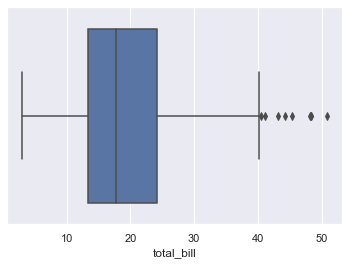

In [17]:
sns.boxplot(x='total_bill', data=tips);

Ou, mais comumente, com relação a uma variável categória, nesse caso, o dia da semana `day`:

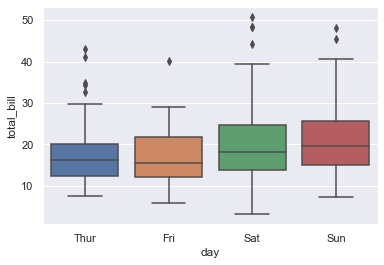

In [19]:
sns.boxplot(x='day', y='total_bill', data=tips);

Existem diversos outros gráficos mais avançados disponíveis na biblioteca seaborn, que requerem cuidado ao ser utilizados para serem bem entendidos pelo público, como por exemplo:

- violin plots
- strip plots
- swarm plots
- point plot
Todos eles acabam sendo variações, com suas vantagens e desvantagens, do que é possível fazer com o boxplot.

Exemplo de *point plot*

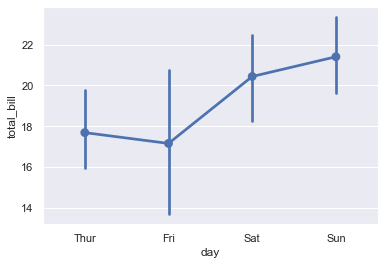

In [21]:
sns.pointplot(x='day', y='total_bill', data=tips);

Exemplo de violin plot com uso do parâmetro `hue` para destacar uma segunda variável categórica no gráfico além de `day`: `smoker`.

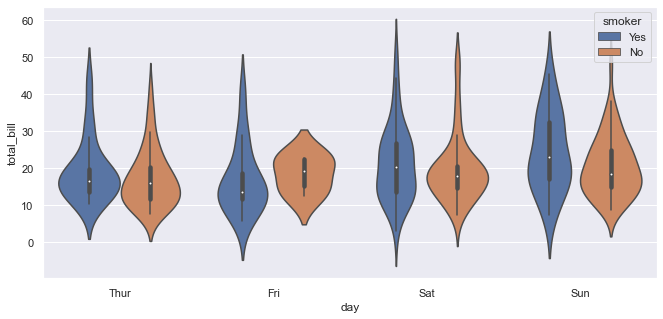

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 5))
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips);

Aqui na verdade tem um aspecto muito interessante da biblioteca seaborn: a sua API facilita passar poucos parâmetros como **x**, **y**, **hue** e data para fazer um gráfico bem elaborado que demandaria possivelmente várias linhas de código usando matplotlib diretamente.

Além de ser uma API bem **consistente**: ela aceita os mesmos parâmetros para diferentes tipos de gráficos.

Já matplotlib, por exemplo, temos o comando plot para gráfico de linha que aceita os parâmetros **x** e **y**, já o comando bar aceita **x** e **height** e **width**.

## Matriz
O principal gráfico em termos de matriz é o heatmap ou mapa de calor.

Podemos utilizar a função `corr()` que calcula a correlação linear (por padrão, de [Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)) entre as variáveis contínuas do nosso DataFrame e retorna uma matriz numérica com os valores dessa correlação.

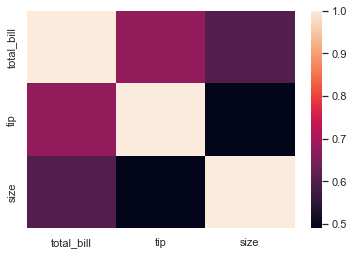

In [24]:
sns.heatmap(tips.corr());

Onde 1 quer dizer correlação perfeita, e zero baixa nenhuma correlação linear, e -1 correlação negativa perfeita (quando uma aumenta, outra diminui).

Para facilitar a visualização, podemos mudar o esquema de cores para o *coolwarm* ou quente/frio e mostrar os valores:

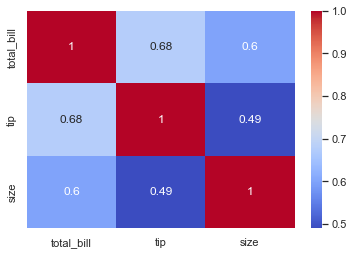

In [25]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True);

## Regressão
Primariamente para visualizar relacionamentos lineares via [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) ou mesmo logística.

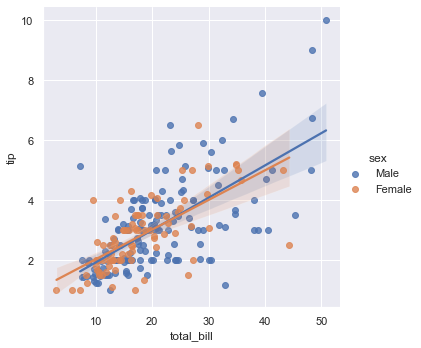

In [26]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips);

**Note de novo aqui a consistência da API do seaborn**, na qual com os mesmos parâmetros x, y, hue e data fizemos outro gráfico.

A documentação tem um tutorial bem completo sobre o tema:

- [Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)

## Estilos e Cores
As duas funções mais valiosas para estilo com seaborn:

- [set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style): darkgrid, whitegrid, dark, white, ticks
- [set_context](https://seaborn.pydata.org/generated/seaborn.set_context.html): paper, notebook, talk ou poster
A primeira é majoritariamente para mudar as cores, enquanto a segunda tem uma característica importante: facilitar a visualização para diferentes contextos.

Exemplo, para um poster, geralmente deseja-se letras maiores:

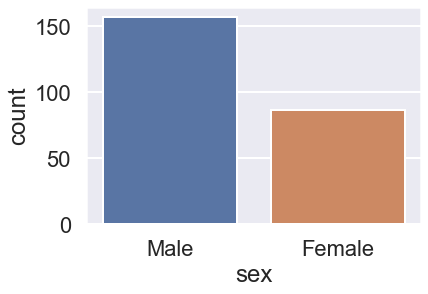

In [28]:
sns.set_context('poster')
sns.countplot(x='sex', data=tips);

## Referências
A principal e mais útil referência que posso citar é a documentação do próprio seaborn. Ela é incrivelmente boa, acima da média comparada a todas as bibliotecas que vimos até então.

https://seaborn.pydata.org/index.html

---